# Bikeshare Data

## Importing libraries

In [379]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [380]:
sns.set_theme(style="whitegrid")

## Basic Data Analysis

In [381]:
df = pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [382]:
num_cols = ['age', 'bmi']

In [383]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


The data ranges from 18 to 64 years age range.

In [384]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [385]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

There are no null values in our sample data.

In [386]:
df['children'].unique()

array([0, 1, 3, 2, 5, 4])

In [387]:
cat_cols = ['sex', 'children', 'smoker', 'region']

In [388]:
df[cat_cols] = df[cat_cols].astype('category')

In [389]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   age       1338 non-null   int64   
 1   sex       1338 non-null   category
 2   bmi       1338 non-null   float64 
 3   children  1338 non-null   category
 4   smoker    1338 non-null   category
 5   region    1338 non-null   category
 6   charges   1338 non-null   float64 
dtypes: category(4), float64(2), int64(1)
memory usage: 37.4 KB


Great, we converted all the object data types to categorical.

> ---

## Data Visualisation

In [390]:
class dataVisualisation:

    def __init__(self, df, style='darkgrid'):
        self.df = df
        self.style = style
        sns.set_style(style)

    def plot_boxplot(self, x_column = None, y_column = None, hue = None, col = None, palette='husl'):
        """
        Input: Takes in x_column, y_column, hue and col.
        Output: Outputs a boxplot.
        """
        graph = sns.catplot(x = x_column, y = y_column, data = self.df,
                            hue = hue, col = col, kind = "box", 
                            legend = False, palette= palette)

        plt.xlabel(x_column)
        plt.ylabel("FRQ")
        plt.show()

    def plot_displot(self, x_column = None, bins = None, kde = None, hue = None, col = None, multiple = 'stack', palette='husl'):
        """Input: Takes in x_column, bins size, kde, hue and col.
        Output: Outputs a displot.
        """
        graph = sns.displot(x = x_column, bins = bins, data = self.df,
                            hue = hue, col = col, kde = kde
                            , multiple = multiple, palette=palette)
        plt.xlabel(x_column)
        plt.ylabel("Count")
        plt.show()

    def plot_countplot(self, column = None, hue = None, rotation = None):
        """
        Input: Takes in column and hue.
        Output: Displays a countplot.
        """
        graph = sns.countplot(x = column, data = self.df, hue = column,
                              order = df[column].value_counts().index,
                              legend=False)
        
        for container in graph.containers:
            graph.bar_label(container)
        plt.xticks(rotation=45)
        plt.show()

    def plot_lineplot(self, x_column = None, y_column = None, hue = None, markers = True, rotation=0):
        """
        Input: Takes in x_column, y_column, hue, markers and rotation.
        Output: Displays a lineplot.
        """
        graph = sns.lineplot(x=x_column, y=y_column, data = self.df, hue = hue,
                             marker = 'o' if markers else None, linewidth=2)
        
        plt.xticks(rotation=rotation)
        plt.xlabel(x_column)
        plt.ylabel(y_column)
        plt.title(f"{y_column} vs. {x_column}")
        if hue:
            plt.legend(title='Hue' if hue else None)
        plt.show()

    def plot_piechart(self, column_name, autopct = '%1.2f%%', startangle = 90, shadow=True):
        """
        Input: Takes in column name (categorical).
        Output: Displays a pie-chart.
        """
        counts = self.df[column_name].value_counts()
        graph = plt.pie(counts, labels=counts.index, startangle=startangle,
                        autopct=autopct, shadow=shadow, counterclock=False)
        
        plt.axis("equal")
        plt.title(f"Distribution of {column_name}")
        plt.tight_layout
        plt.show()

In [391]:
viz = dataVisualisation(df = df)

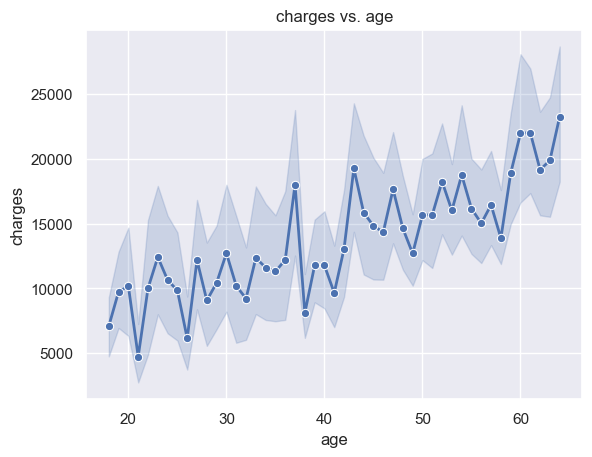

In [392]:
viz.plot_lineplot('age', 'charges');
plt.show()

We can see that as age goes up, the medical costs go up as well.

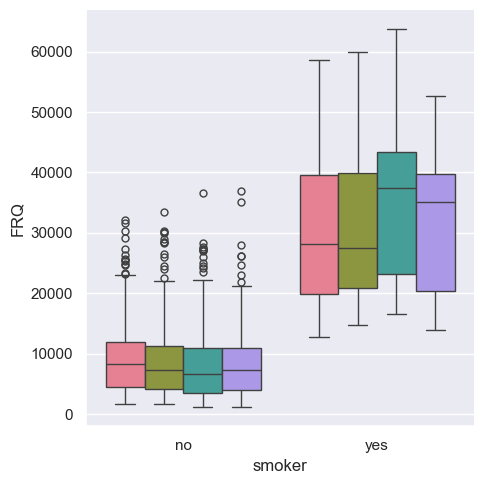

In [393]:
viz.plot_boxplot('smoker', 'charges', hue='region');
plt.show()

Smokers had much higher medical costs.

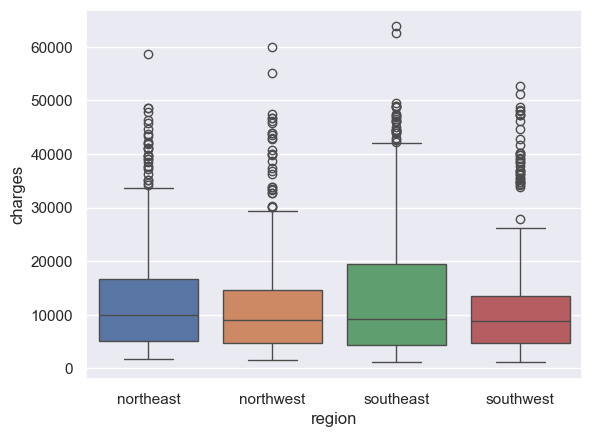

In [394]:
sns.boxplot(x='region', y='charges', hue='region', data=df)
plt.show()

The data is well distrubuted across regions.

In [427]:
from sklearn.preprocessing import LabelEncoder

df_encoded = df.copy()

le = LabelEncoder()
for col in cat_cols:
    df_encoded[col] = le.fit_transform(df_encoded[col])

corr = df_encoded.corr()

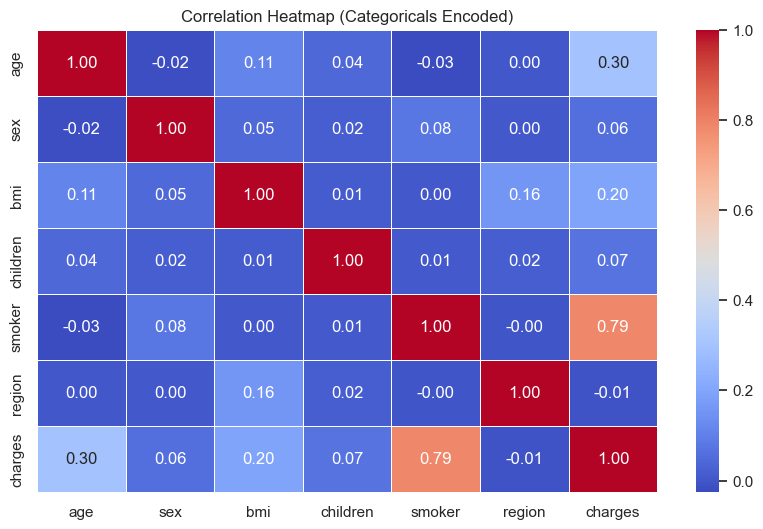

In [431]:
plt.figure(figsize=(10, 6))
sns.heatmap(
    corr, 
    annot=True, 
    cmap="coolwarm", 
    fmt=".2f", 
    linewidths=0.5
)
plt.title("Correlation Heatmap (Categoricals Encoded)")
plt.show()

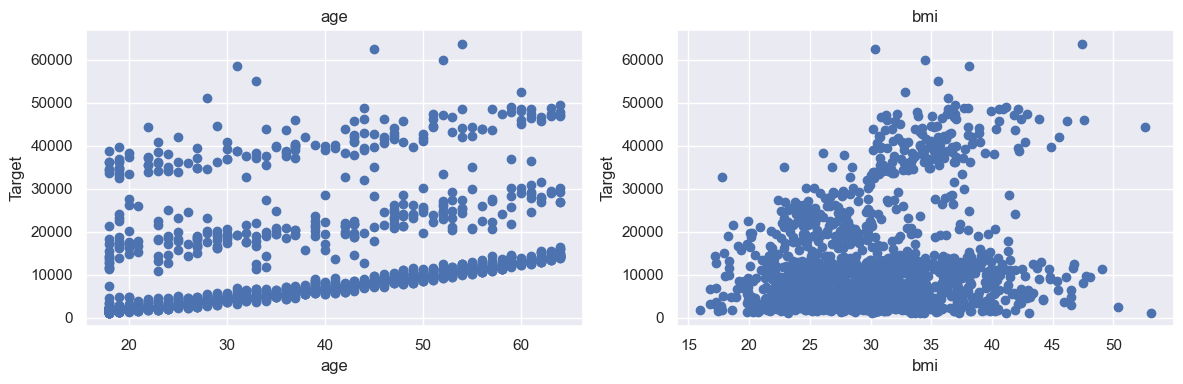

In [395]:
n = len(num_cols)

fig, axes = plt.subplots(1, n, figsize=(6*n, 4))

for idx, col in enumerate(num_cols):
    axes[idx].scatter(df[col], y)
    axes[idx].set_title(col)
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel('Target')

plt.tight_layout()
plt.show()

> ---

## ML preprocessing and Model Implementation

In [396]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import r2_score, mean_squared_error

In [397]:
X = df.drop('charges', axis=1)
y = df['charges']

In [398]:
X = pd.get_dummies(X, drop_first=True)

In [399]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.4, random_state=0
)

### Polynomial Regression

In [400]:
for degree in [1, 2, 3]:
    poly = PolynomialFeatures(degree)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)

    lr = LinearRegression()
    lr.fit(X_train_poly, y_train)
    y_pred = lr.predict(X_test_poly)

    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"Degree {degree}: MSE = {mse:.2f}, R² = {r2:.4f}")

Degree 1: MSE = 32904204.56, R² = 0.7874
Degree 2: MSE = 20026395.43, R² = 0.8706
Degree 3: MSE = 70027223.42, R² = 0.5476


Using quadratic here yields us the least MSE.

### Splines

In [401]:
from pygam import LinearGAM, s, l

In [402]:
linear_spline = LinearGAM(s(0) + s(1) + s(2) + s(4) + s(5)).fit(X_train, y_train)
linear_spline.summary()

LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                     28.5609
Link Function:                     IdentityLink Log Likelihood:                                -15682.6674
Number of Samples:                          802 AIC:                                            31424.4566
                                                AICc:                                           31426.7987
                                                GCV:                                        132425839.2683
                                                Scale:                                       123964967.382
                                                Pseudo R-Squared:                                   0.1523
Feature Function                  Lam

C:\Users\yashdeshpande\AppData\Local\Temp\ipykernel_8604\736741991.py:2: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  linear_spline.summary()


Here, we can observe that feature 1 and 2 benefit from splines.

In [403]:
X_train_np = X_train.to_numpy()
X_test_np = X_test.to_numpy()

linear_GAM = LinearGAM(
    s(0) + s(1) + l(2) + l(3) + l(4) + l(5)
).fit(X_train, y_train)

lam_values = 10.0 ** np.arange(-3, 4)
linear_GAM.gridsearch(X_train_np, y_train, lam=lam_values)

  0% (0 of 7) |                          | Elapsed Time: 0:00:00 ETA:  --:--:--
 28% (2 of 7) |#######                   | Elapsed Time: 0:00:00 ETA:   0:00:00
 57% (4 of 7) |##############            | Elapsed Time: 0:00:00 ETA:   0:00:00
 85% (6 of 7) |######################    | Elapsed Time: 0:00:00 ETA:   0:00:00
100% (7 of 7) |##########################| Elapsed Time: 0:00:00 Time:  0:00:00


LinearGAM(callbacks=[Deviance(), Diffs()], fit_intercept=True, 
   max_iter=100, scale=None, 
   terms=s(0) + s(1) + l(2) + l(3) + l(4) + l(5) + intercept, 
   tol=0.0001, verbose=False)

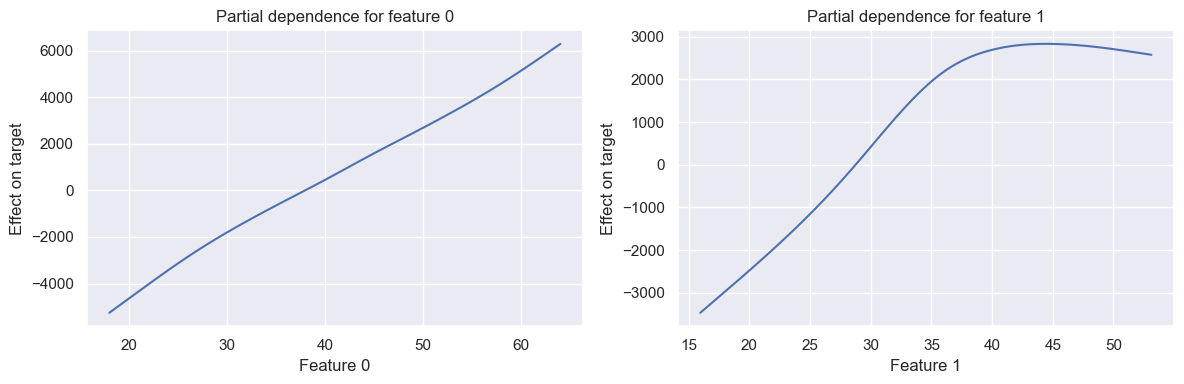

In [404]:
features = [0, 1]

fig, axes = plt.subplots(1, len(features), figsize=(12, 4)) 

for idx, i in enumerate(features):
    XX = linear_GAM.generate_X_grid(term=i)
    axes[idx].plot(XX[:, i], linear_GAM.partial_dependence(term=i, X=XX))
    axes[idx].set_title(f'Partial dependence for feature {i}')
    axes[idx].set_xlabel(f'Feature {i}')
    axes[idx].set_ylabel('Effect on target')

plt.tight_layout()
plt.show()

In [405]:
y_pred = linear_GAM.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("r2_score:", r2)

Mean Squared Error: 135528358.6495778
r2_score: 0.12452030135397685


Splines seems to perform worse than polynomial regression

### Decision Trees

In [406]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score

In [407]:
dt = DecisionTreeRegressor(max_depth = 5, random_state=42)
dt.fit(X_train, y_train)

,criterion,'squared_error'
,splitter,'best'
,max_depth,5
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


In [408]:
y_pred = dt.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Decision Tree MSE: {mse:.2f}, R²: {r2:.4f}")

Decision Tree MSE: 24751882.76, R²: 0.8401


Choosing best depth of trees using Cross Validation:

In [409]:
best_score = -np.inf
best_depth = None
scores_list = []

for depth in range(1, 10):
    dt = DecisionTreeRegressor(max_depth = depth, random_state=42)
    scores = cross_val_score(dt, X_train, y_train, cv = 5, scoring='r2')
    mean_score = scores.mean()
    scores_list.append(mean_score)

    if mean_score > best_score:
        best_score = mean_score
        best_depth = depth

print(f"Best max_depth: {best_depth} with CV R²: {best_score:.4f}")

Best max_depth: 3 with CV R²: 0.8067


In [410]:
dt = DecisionTreeRegressor(max_depth = 3, random_state=42)
dt.fit(X_train, y_train)

,criterion,'squared_error'
,splitter,'best'
,max_depth,3
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


In [411]:
y_pred = dt.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Decision Tree MSE: {mse:.2f}, R²: {r2:.4f}")

Decision Tree MSE: 18949565.33, R²: 0.8776


A decision tree with depth of 3 gives us the best R2_score and mse.

### Random Forests

In [412]:
from sklearn.ensemble import RandomForestRegressor

In [413]:
rf = RandomForestRegressor(
    n_estimators = 500,
    max_depth = None,
    oob_score=True, 
    random_state = 42
)
rf.fit(X_train, y_train)

,n_estimators,500
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,True


In [414]:
y_pred = rf.predict(X_test)
print("Random Forest MSE:", mean_squared_error(y_test, y_pred))
print("Random Forest R²:", r2_score(y_test, y_pred))

Random Forest MSE: 19883156.366112377
Random Forest R²: 0.8715597243485834


In [415]:
best_r2 = -np.inf
best_n = None
r2_list = []

for n in range(10, 201, 10):
    rf = RandomForestRegressor(n_estimators=n, max_depth=None, random_state=42)
    scores = cross_val_score(rf, X_train, y_train, cv=5, scoring='r2')
    mean_r2 = scores.mean()
    r2_list.append(mean_r2)
    if mean_r2 > best_r2:
        best_r2 = mean_r2
        best_n = n

print(f"Best n_estimators: {best_n}, CV R²: {best_r2:.4f}")

Best n_estimators: 120, CV R²: 0.7745


### Gradient Boosting

In [416]:
from sklearn.ensemble import GradientBoostingRegressor

In [417]:
gbr = GradientBoostingRegressor(
    n_estimators = 35, 
    learning_rate = 0.1,
    max_depth = 3,
    random_state = 42
)
gbr.fit(X_train, y_train)

,loss,'squared_error'
,learning_rate,0.1
,n_estimators,35
,subsample,1.0
,criterion,'friedman_mse'
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_depth,3
,min_impurity_decrease,0.0
,init,None


In [418]:
test_errors = []
for y_pred_stage in gbr.staged_predict(X_test):
    mse = mean_squared_error(y_test, y_pred_stage)
    test_errors.append(mse)

optimal_trees = np.argmin(test_errors) + 1
print("Optimal number of trees:", optimal_trees)
print("Lowest test MSE:", min(test_errors))

r2_scores = []
for y_pred_stage in gbr.staged_predict(X_test):
    r2 = r2_score(y_test, y_pred_stage)
    r2_scores.append(r2)

# Find the stage with the highest R²
optimal_trees = np.argmax(r2_scores) + 1
max_r2 = max(r2_scores)
print("Highest R² on test set:", max_r2)

Optimal number of trees: 35
Lowest test MSE: 16863332.107767787
Highest R² on test set: 0.8910670426545275


### Extreme Gradient Boosting

In [419]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

In [420]:
xgbr = xgb.XGBRegressor(
    n_estimators = 100,
    learning_rate = 0.1,
    max_depth = 3,
    subsample = 0.8,
    colsample_bytree = 0.8,
    random_state = 42
)

xgbr.fit(
    X_train, y_train,
)

,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,0.8
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [421]:
param_grid = {
    'max_depth': [3, 4, 5],
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [50, 100, 200],
    'subsample': [0.7, 0.8, 1.0],
    'colsample_bytree': [0.7, 0.8, 1.0]
}

In [422]:
xgbr = xgb.XGBRegressor(random_state=42)

In [423]:
grid_search = GridSearchCV(
    estimator=xgbr,
    param_grid=param_grid,
    cv=5,
    scoring='r2',
    verbose=2,
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 243 candidates, totalling 1215 fits


,estimator,"XGBRegressor(...ree=None, ...)"
,param_grid,"{'colsample_bytree': [0.7, 0.8, ...], 'learning_rate': [0.01, 0.05, ...], 'max_depth': [3, 4, ...], 'n_estimators': [50, 100, ...], ...}"
,scoring,'r2'
,n_jobs,-1
,refit,True
,cv,5
,verbose,2
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,objective,'reg:squarederror'


In [424]:
print("Best parameters:", grid_search.best_params_)
print("Best CV R²:", grid_search.best_score_)

Best parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 100, 'subsample': 1.0}
Best CV R²: 0.8184943928854738


In [425]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
print("Test MSE:", mean_squared_error(y_test, y_pred))
print("Test R²:", r2_score(y_test, y_pred))

Test MSE: 16441907.340226678
Test R²: 0.8937893424902602


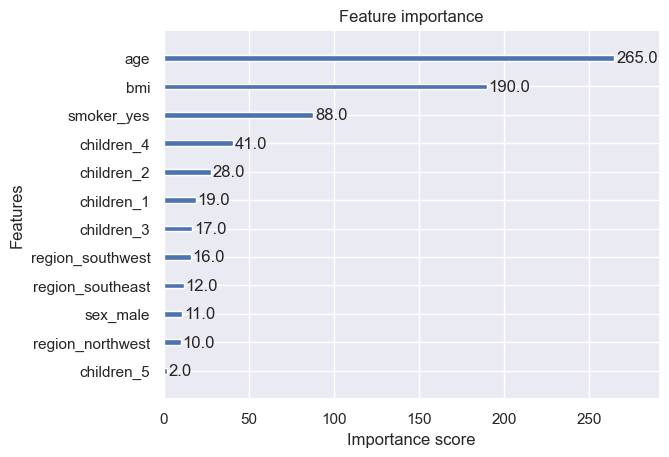

In [426]:
xgb.plot_importance(best_model)
plt.show()

Seems like age, BMI are the most influential factors in predicting medical costs and Extreme Gradient Boosting gives us the least MSE.

> ---